In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 20.2 MB/s eta 0:00:00


In [2]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("for-the-fish").project("classification-of-common-freshwater-pet-store-fish-3dvvi")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Classification-of-Common-Freshwater-Pet-Store-Fish-4 in yolov11:: 100%|██████████| 1966/1966 [00:00<00:00, 6899.36it/s]


In [4]:
!yolo task=detect mode=train model=yolo11n-seg.pt data='/content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml' epochs=50 imgsz=640 plots=True

100% 5.90M/5.90M [00:00<00:00, 98.1MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffe

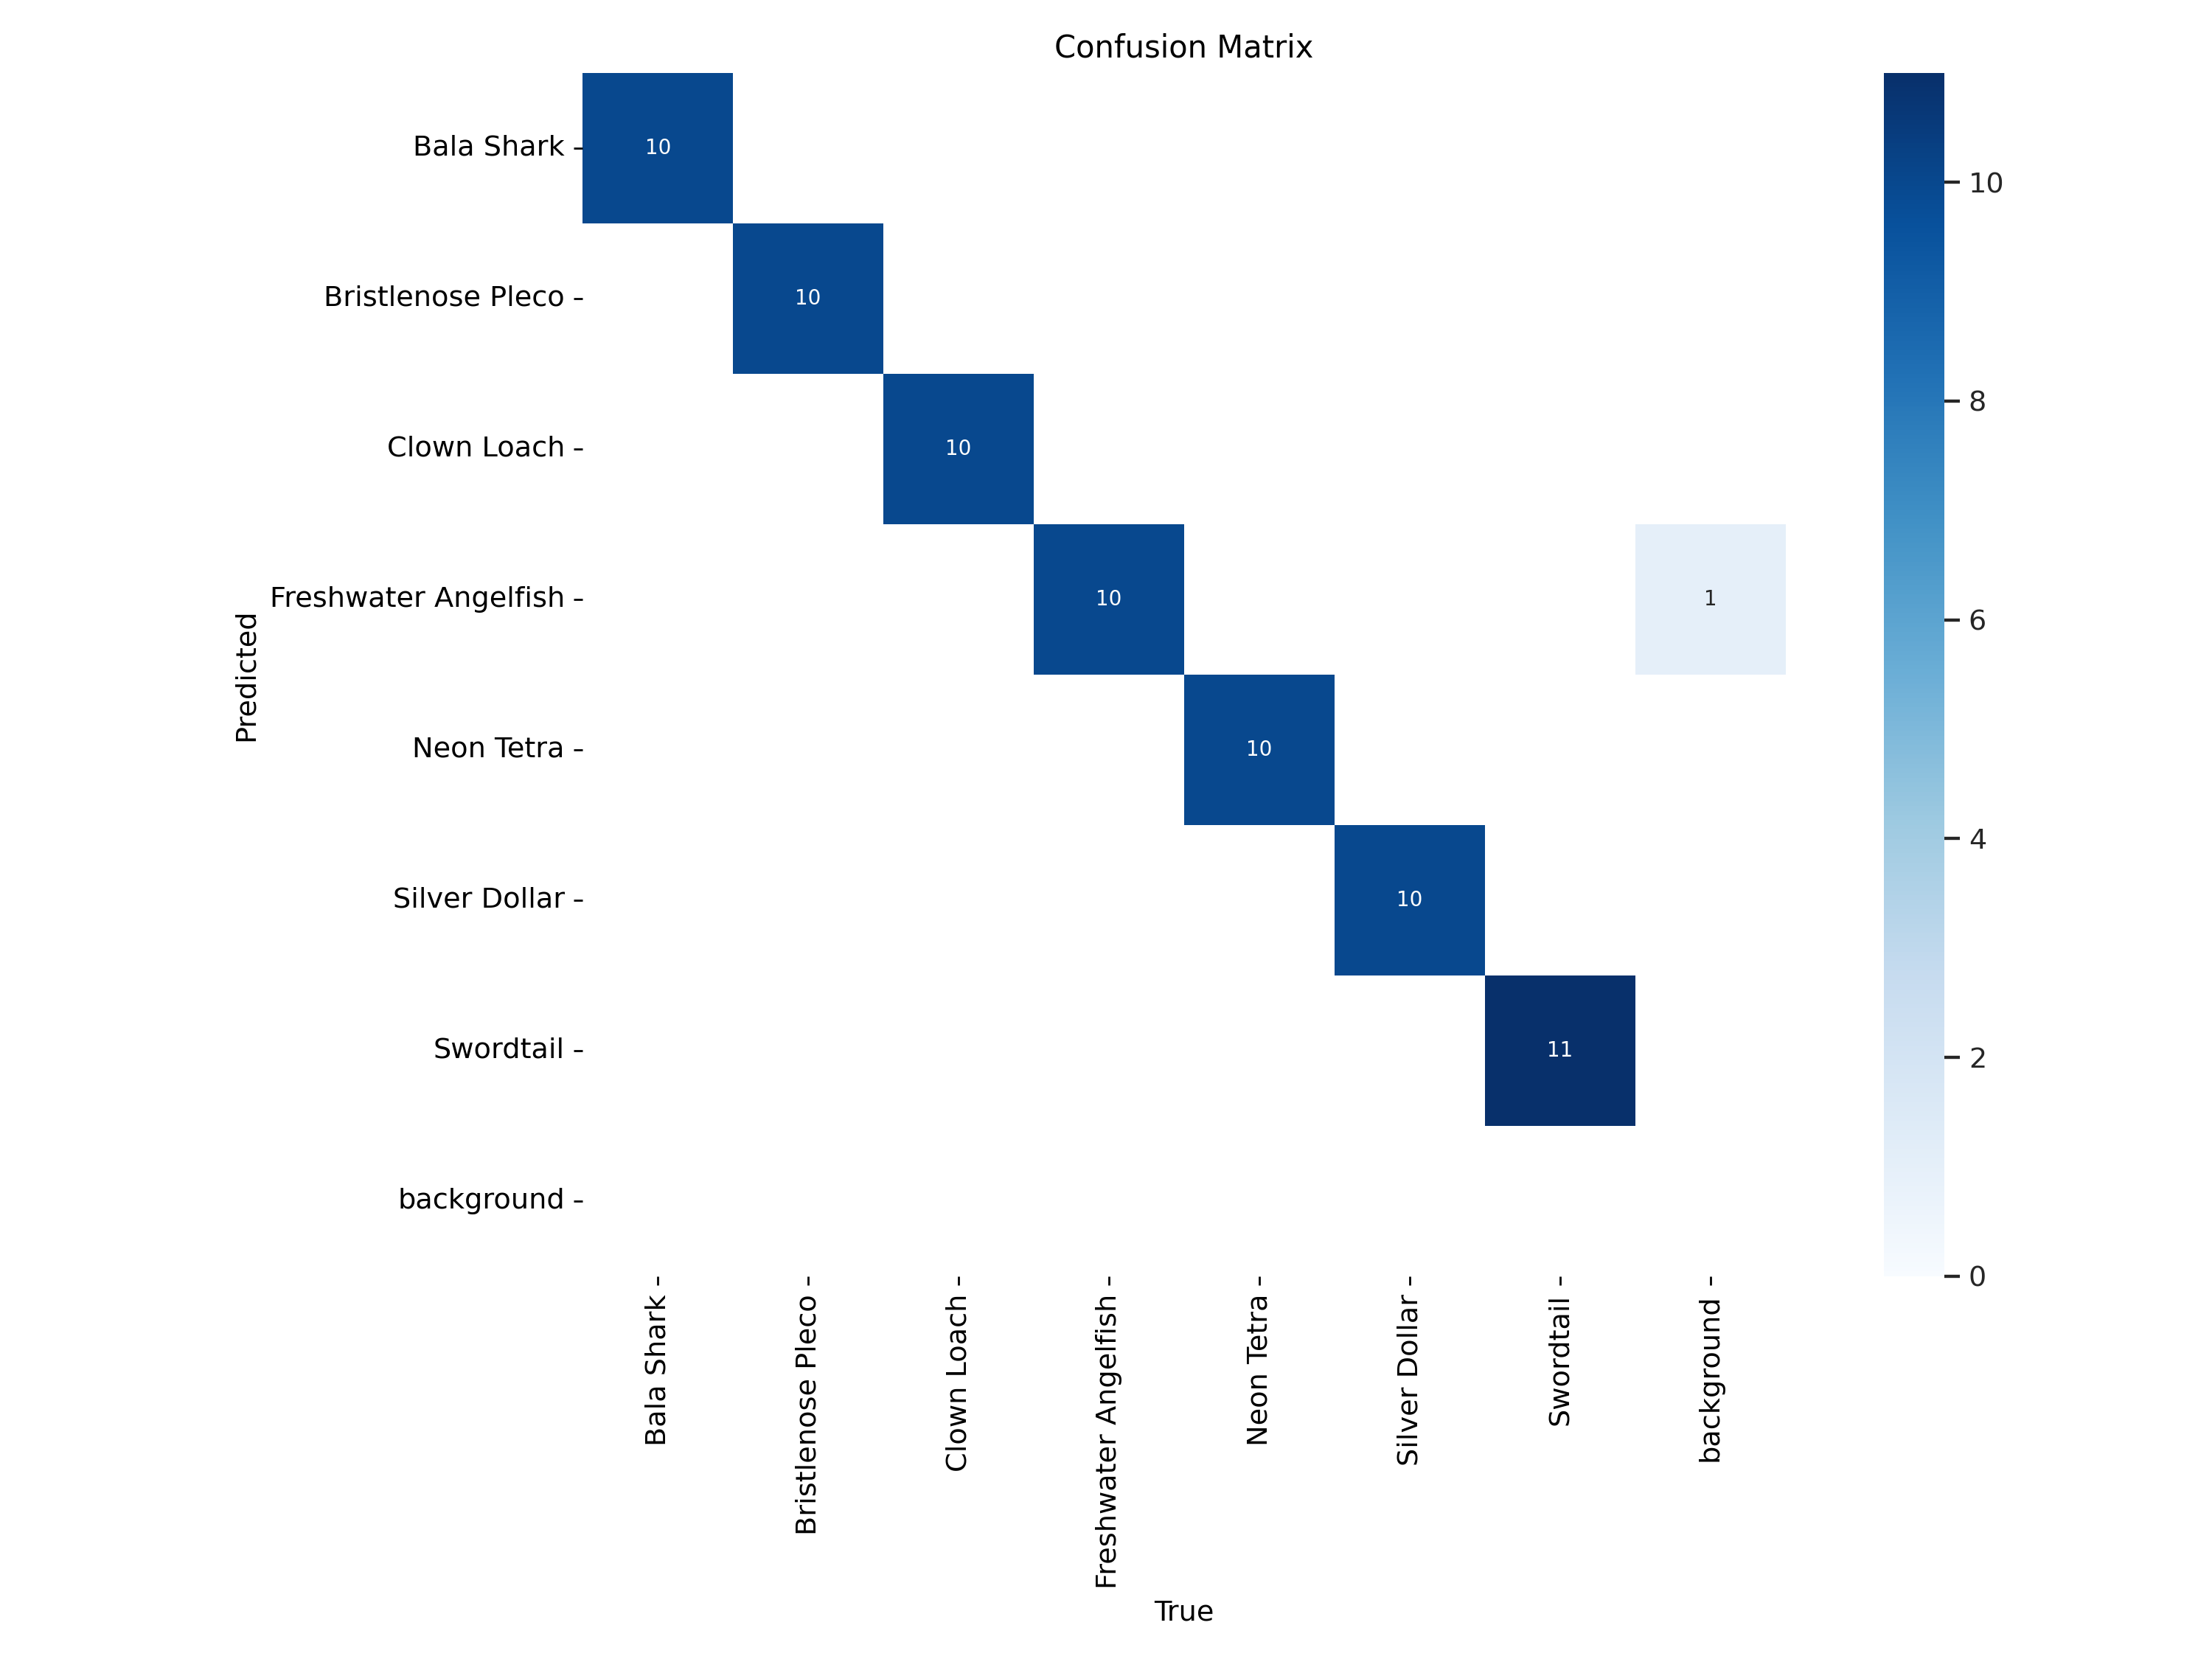

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

In [6]:
!yolo task=detect mode=predict model='/content/runs/segment/train/weights/best.pt' conf=0.25 source='/content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images' save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,835,933 parameters, 0 gradients, 10.2 GFLOPs

image 1/70 /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images/10_jpg.rf.28fb1992da1916097a2a67037b25e9bd.jpg: 640x640 1 Swordtail, 20.9ms
image 2/70 /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images/14_jpg.rf.099242f6d01c39a3ad9bf7111d64c9a7.jpg: 640x640 1 Bala Shark, 10.4ms
image 3/70 /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images/16_jpg.rf.36a2263e8ee23a4b45028d926ae819b3.jpg: 640x640 1 Clown Loach, 10.6ms
image 4/70 /content/Classification-of-Common-Freshwater-Pet-Store-Fish-4/test/images/16_jpg.rf.a5ea42582b485d13996382aaf5685367.jpg: 640x640 1 Swordtail, 9.9ms
image 5/70 /content/Classification-of-Comm

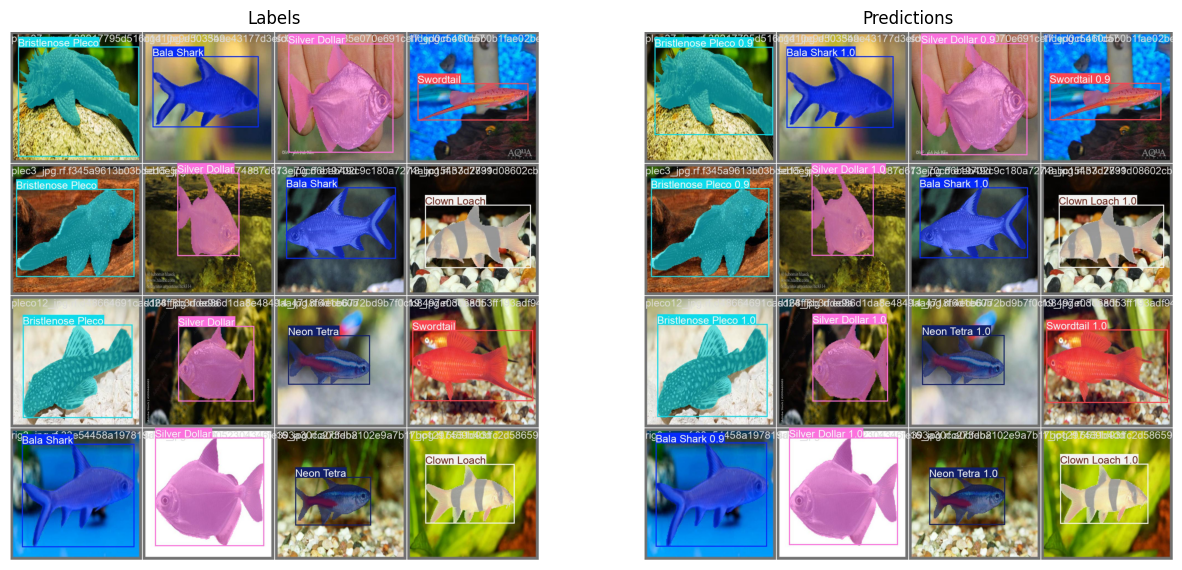

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_labels = mpimg.imread('/content/runs/segment/train/val_batch0_labels.jpg')
img_pred = mpimg.imread('/content/runs/segment/train/val_batch0_pred.jpg')

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(img_labels)
axes[0].set_title('Labels')
axes[0].axis('off')

axes[1].imshow(img_pred)
axes[1].set_title('Predictions')
axes[1].axis('off')

plt.show()

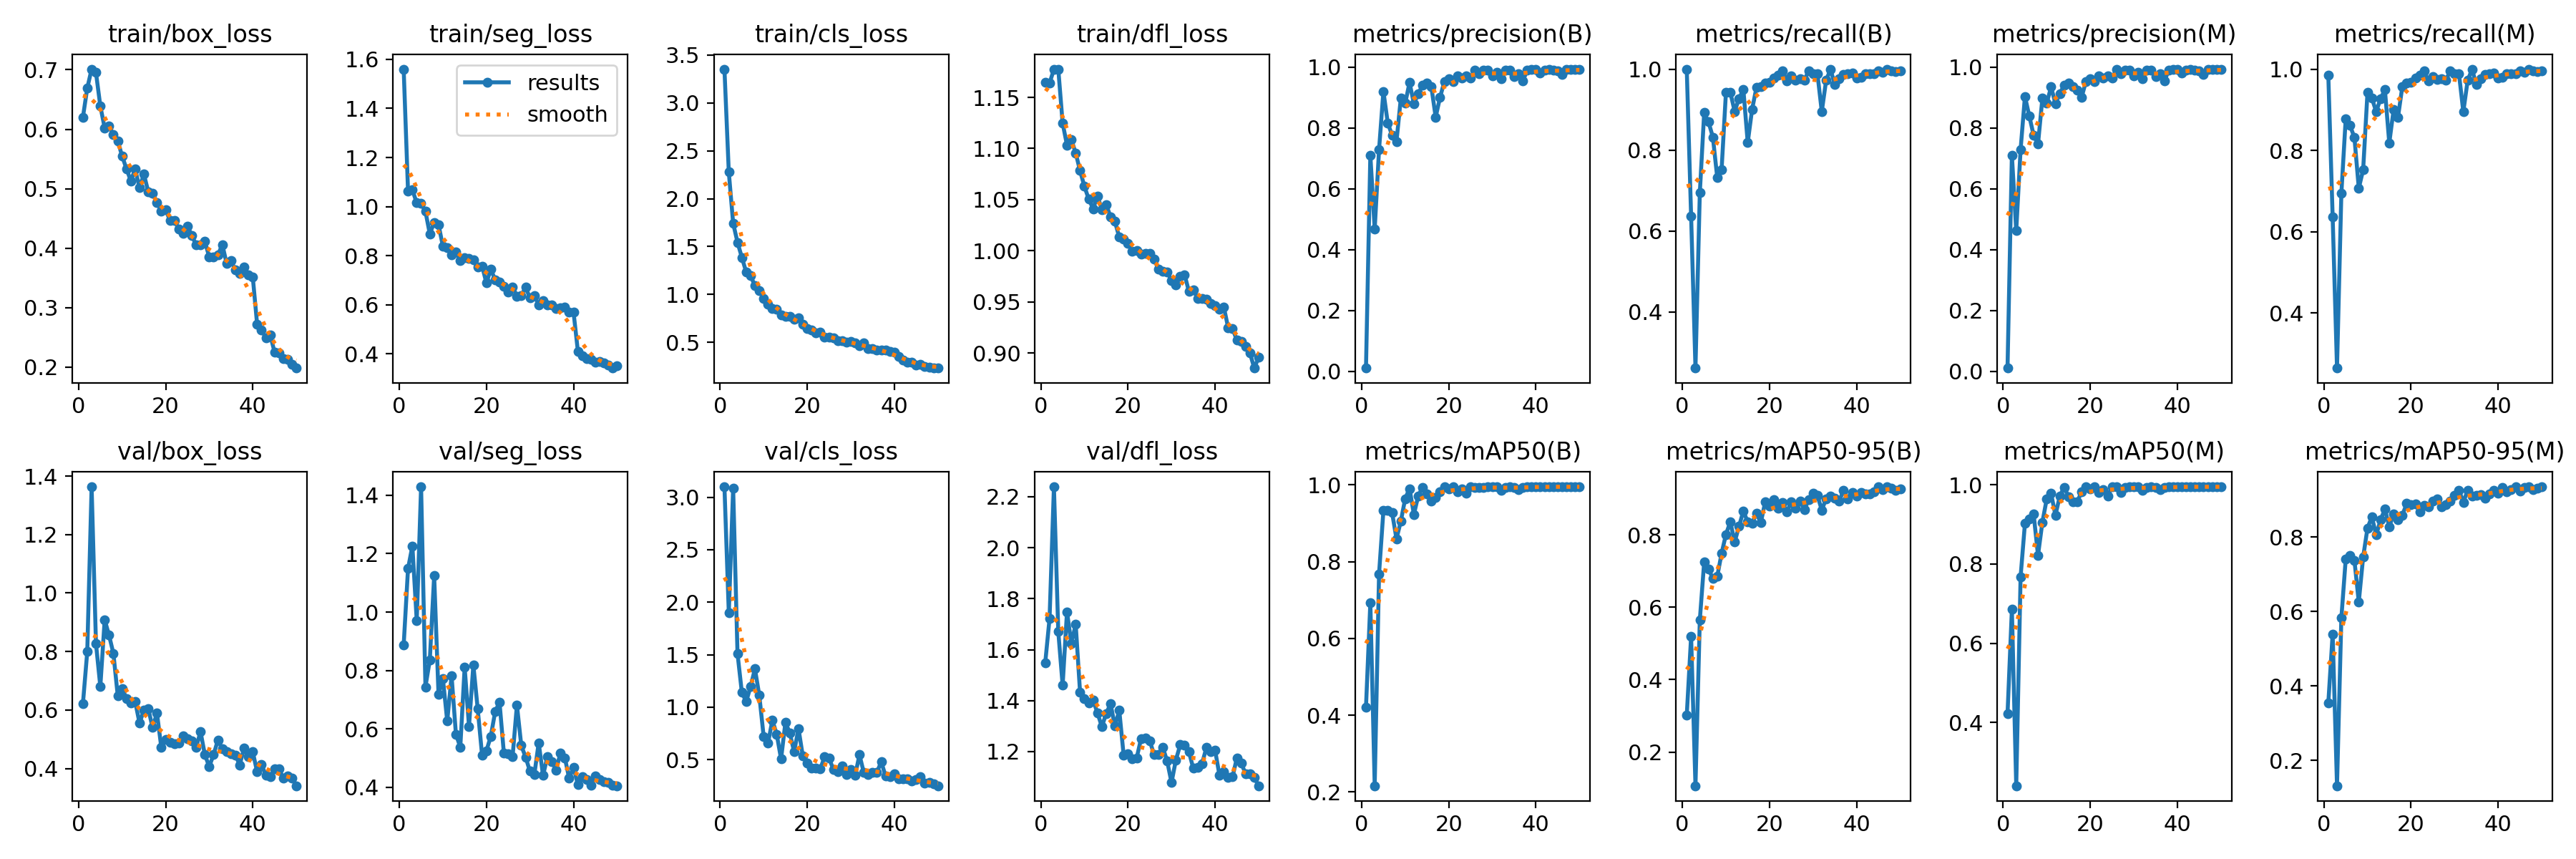

In [18]:
IPyImage(filename=f'/content/runs/segment/train/results.png', width=600)

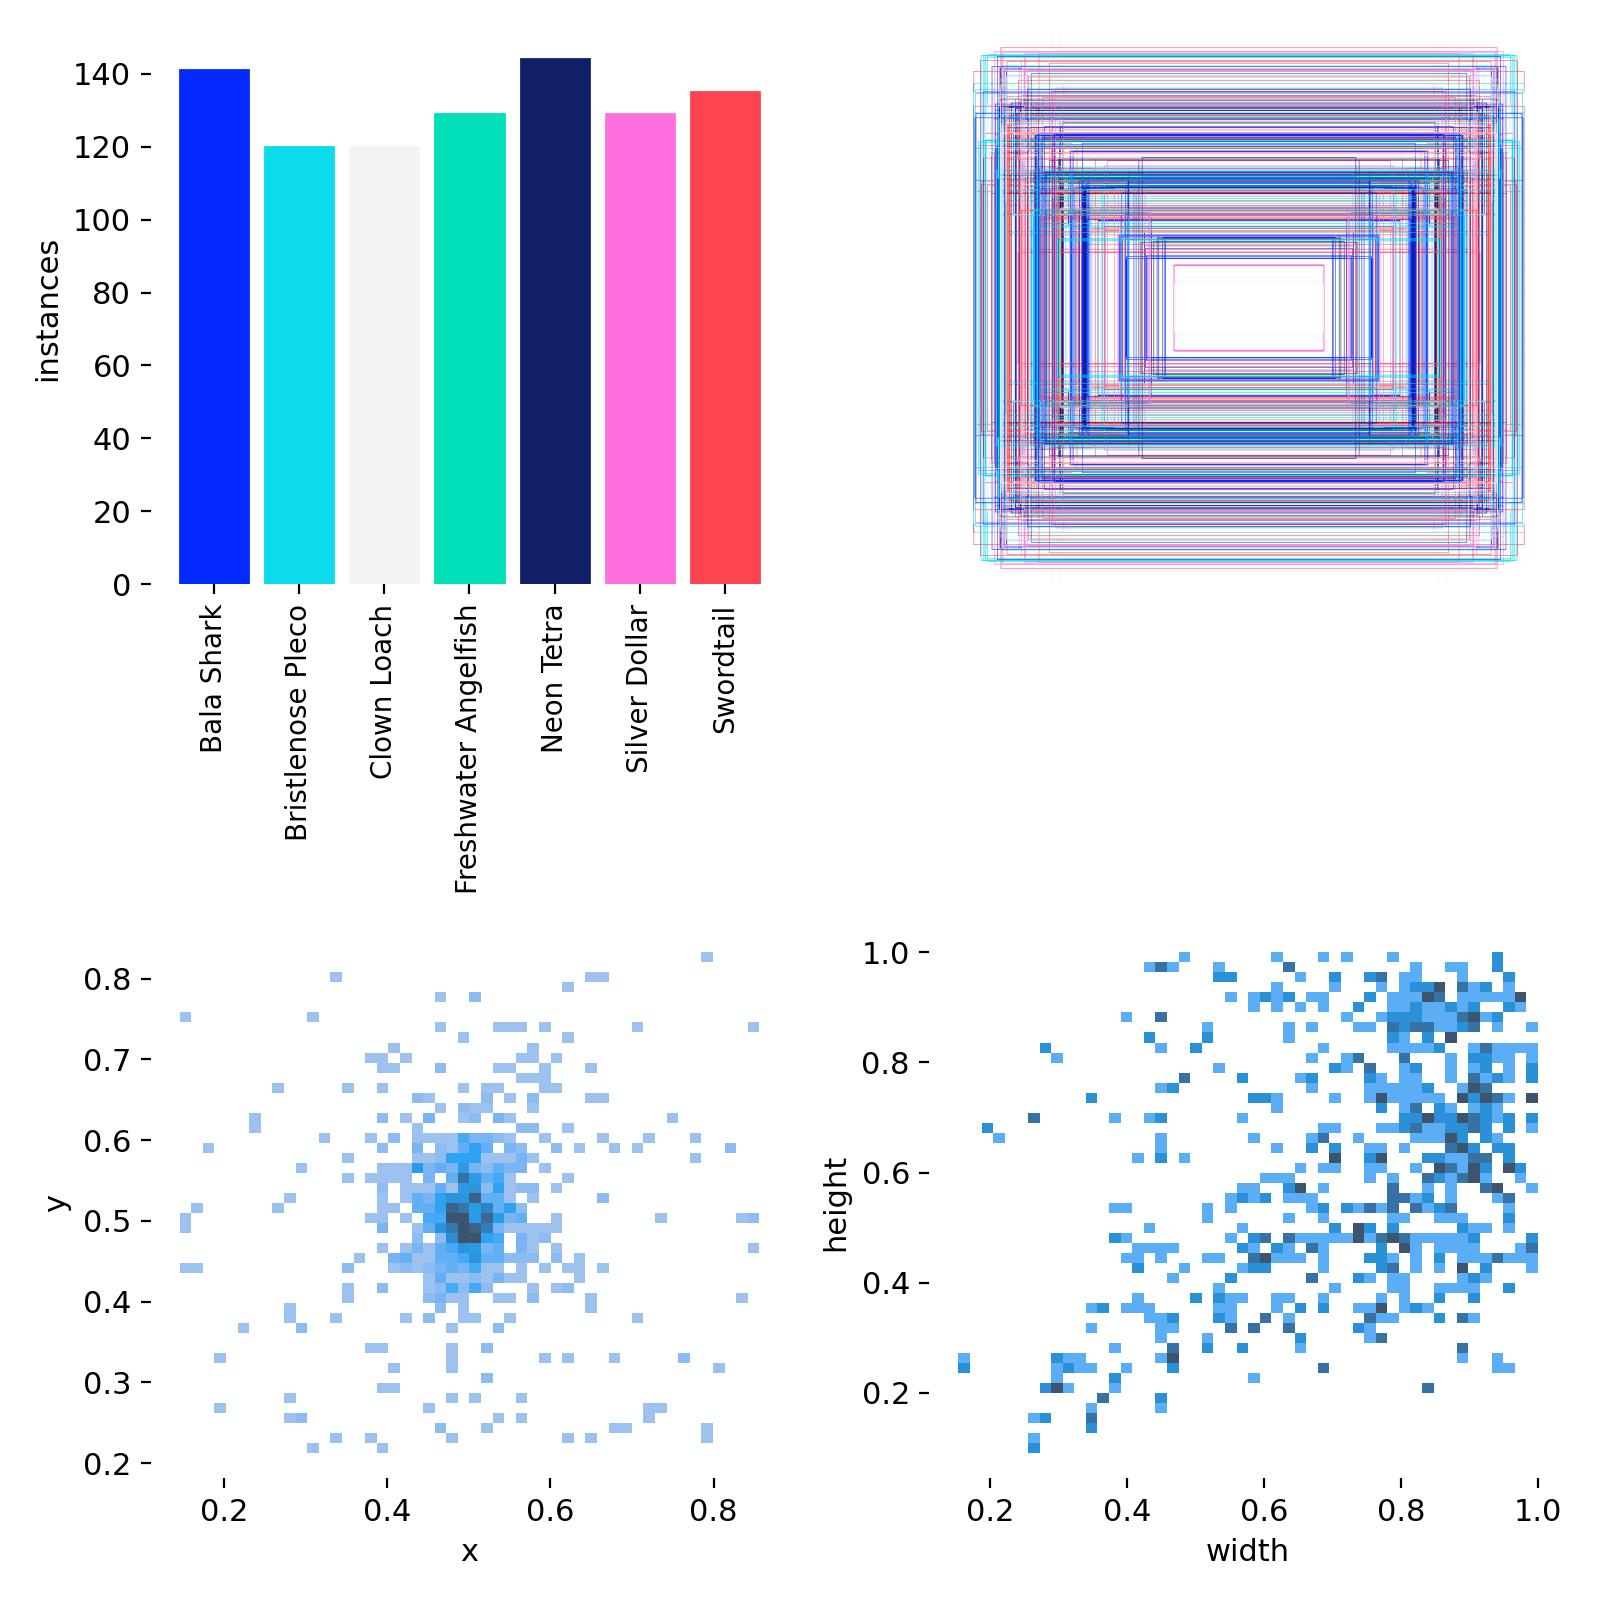

In [23]:
IPyImage(filename=f'/content/runs/segment/train/labels.jpg', width=600)

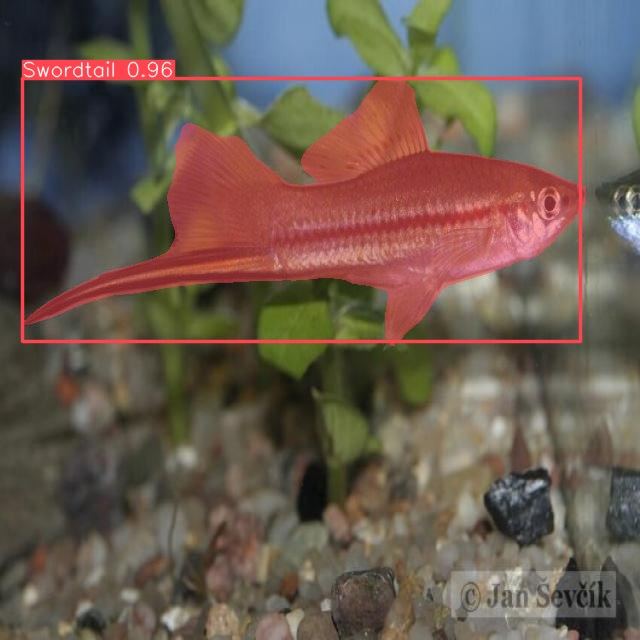

In [10]:
IPyImage(filename=f'/content/runs/segment/predict/10_jpg.rf.28fb1992da1916097a2a67037b25e9bd.jpg', width=600)

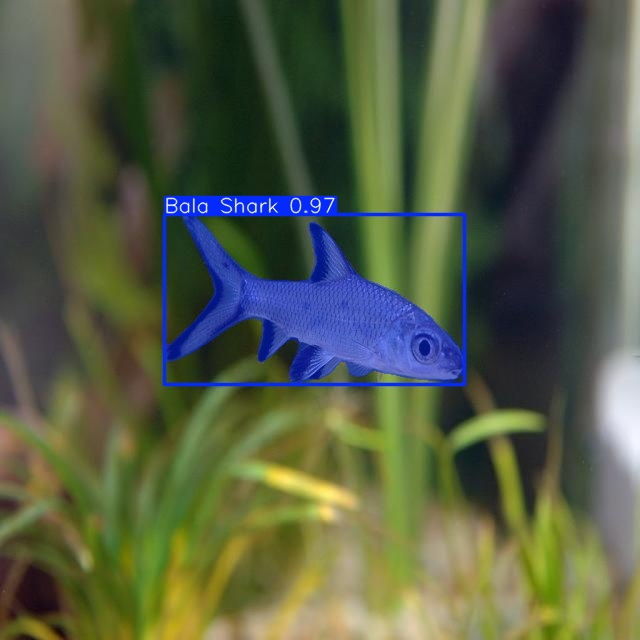

In [12]:
IPyImage(filename=f'/content/runs/segment/predict/18_jpg.rf.b404825301bec175ef2b20825025af1c.jpg', width=600)